# Fuzzy vs Medcat

## Define base directory

In [2]:
baseDir = '/superbugai-data/yash/temp'

## Read SNOMED Vocabulary

In [3]:
import pandas as pd

snomedDf = pd.read_csv(baseDir + '/preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']
snomedDf['cui'] = snomedDf.cui.astype(str)
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, ...",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,NaN,72706784
4,1000021000168103,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (tra...,P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (...,P,SNOMED-CT,NaN,72706784


## Medcat results using custom CDB file

### Read file

In [4]:
import pandas as pd

matchingOutputMedcatDf = pd.read_csv(baseDir + '/mapped_concept_names_medcat_2.csv')
matchingOutputMedcatDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c..."
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',..."
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


### Process and Format the results

In [5]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []
for i, row in matchingOutputMedcatDf.iterrows():
    entities = ast.literal_eval(row["matching_concept"])['entities']
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptPrettyNames.append(conceptPrettyName)
    conceptSourceValues.append(conceptSourceValue)
    contextSimilarityScores.append(maxContextSimilarityScore)

matchingOutputMedcatDf['CUI'] = cuis
matchingOutputMedcatDf['Concept Type'] = conceptTypes
matchingOutputMedcatDf['Concept Pretty Names'] = conceptPrettyNames
matchingOutputMedcatDf['Concept Source Values'] = conceptSourceValues
matchingOutputMedcatDf['Context Similarity Score'] = contextSimilarityScores
matchingOutputMedcatDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c...",161117005,[67667581],Nursery,Nursery,1.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',...",394579002,[7882689],Cardiology,Cardiology,1.0
...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0


### Merge it with SNOMED

In [6]:
import pandas as pd

mergedMedcatDf = pd.merge(matchingOutputMedcatDf, snomedDf, left_on='CUI', right_on='cui', how='left')
mergedMedcatDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,CUI,Concept Type,Concept Pretty Names,Concept Source Values,Context Similarity Score,cui,name,name_status,ontologies,description_type_ids,type_ids
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ...",25876001,[7882689],Emergency,Emergency,1.0,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c...",161117005,[67667581],Nursery,Nursery,1.0,161117005,Nursery (finding),P,SNOMED-CT,finding,67667581.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',...",394579002,[7882689],Cardiology,Cardiology,1.0,394579002,Cardiology (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Aggregate the results

In [7]:
groupedMedcatDf = mergedMedcatDf\
    .groupby(['concept_vocabulary_id', 'description_type_ids'])\
        .agg(
                {
                    'concept_name':'count',
                }
            )\
                .reset_index()
groupedMedcatDf

,concept_vocabulary_id,description_type_ids,concept_name
0,mimiciv_cs_place_of_service,finding,1
1,mimiciv_cs_place_of_service,qualifier value,3
2,mimiciv_drug_ndc,AU qualifier,1
3,mimiciv_drug_ndc,body structure,4
4,mimiciv_drug_ndc,clinical drug,83
...,...,...,...
135,mimiciv_vis_discharge_location,qualifier value,2
136,mimiciv_vis_service,body structure,4
137,mimiciv_vis_service,disorder,1
138,mimiciv_vis_service,intended site,1


## Fuzzy results

### Read file

In [8]:
import pandas as pd

mappedConceptsFuzzyDf = pd.read_csv(baseDir + '/' + 'mapped_concept_names_fuzzy_1.csv')
mappedConceptsFuzzyDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"[('Genetics department (environment)', 71, 230..."
1,2000001902,Medicine,mimiciv_cs_place_of_service,"[('Merodicein (substance)', 57, 197790)]"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,[('Emergency department physician (occupation)...
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"[('Well nourished (finding)', 59, 172636)]"
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"[('Cardiology service (procedure)', 68, 230258)]"
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"[('Verdin (organism)', 42, 90892)]"
3838,2000001865,VSURG,mimiciv_vis_service,"[('Causus (organism)', 40, 326208)]"
3839,2000001866,PSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]"
3840,2000001867,TSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]"


### Process and Format the results

In [10]:
import ast

mappedConceptsFuzzyDf["Mapped Concept Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][0])
mappedConceptsFuzzyDf["Mapped ID Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][2])
mappedConceptsFuzzyDf["Mapped Score Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][1])
mappedConceptsFuzzyDf = mappedConceptsFuzzyDf[mappedConceptsFuzzyDf['concept_name'].notna()]
mappedConceptsFuzzyDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"[('Genetics department (environment)', 71, 230...",Genetics department (environment),230127,71
1,2000001902,Medicine,mimiciv_cs_place_of_service,"[('Merodicein (substance)', 57, 197790)]",Merodicein (substance),197790,57
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,[('Emergency department physician (occupation)...,Emergency department physician (occupation),229560,74
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"[('Well nourished (finding)', 59, 172636)]",Well nourished (finding),172636,59
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"[('Cardiology service (procedure)', 68, 230258)]",Cardiology service (procedure),230258,68
...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"[('Verdin (organism)', 42, 90892)]",Verdin (organism),90892,42
3838,2000001865,VSURG,mimiciv_vis_service,"[('Causus (organism)', 40, 326208)]",Causus (organism),326208,40
3839,2000001866,PSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43
3840,2000001867,TSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43


### Merge it with SNOMED

In [11]:
import pandas as pd

mergedFuzzyDf = pd.merge(mappedConceptsFuzzyDf, snomedDf, left_on='Mapped Concept Fuzzy', right_on='name')
mergedFuzzyDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui,name,name_status,ontologies,description_type_ids,type_ids
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"[('Genetics department (environment)', 71, 230...",Genetics department (environment),230127,71,309928004,Genetics department (environment),P,SNOMED-CT,environment,75168589
1,2000001902,Medicine,mimiciv_cs_place_of_service,"[('Merodicein (substance)', 57, 197790)]",Merodicein (substance),197790,57,27730007,Merodicein (substance),P,SNOMED-CT,substance,91187746
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,[('Emergency department physician (occupation)...,Emergency department physician (occupation),229560,74,309294001,Emergency department physician (occupation),P,SNOMED-CT,occupation,16939031
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"[('Well nourished (finding)', 59, 172636)]",Well nourished (finding),172636,59,248324001,Well nourished (finding),P,SNOMED-CT,finding,67667581
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"[('Cardiology service (procedure)', 68, 230258)]",Cardiology service (procedure),230258,68,310036006,Cardiology service (procedure),P,SNOMED-CT,procedure,28321150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001865,VSURG,mimiciv_vis_service,"[('Causus (organism)', 40, 326208)]",Causus (organism),326208,40,45587005,Causus (organism),P,SNOMED-CT,organism,81102976
3838,2000001864,NMED,mimiciv_vis_service,"[('Verdin (organism)', 42, 90892)]",Verdin (organism),90892,42,1465001,Verdin (organism),P,SNOMED-CT,organism,81102976
3839,2000001866,PSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031
3840,2000001867,TSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031


### Aggregate the results

In [12]:
groupedFuzzyDf = mergedFuzzyDf\
    .groupby(['concept_vocabulary_id', 'description_type_ids'])\
        .agg(
                {
                    'concept_name':'count',
                }
            )\
                .reset_index()
groupedFuzzyDf

,concept_vocabulary_id,description_type_ids,concept_name
0,mimiciv_cs_place_of_service,environment,1
1,mimiciv_cs_place_of_service,finding,1
2,mimiciv_cs_place_of_service,occupation,1
3,mimiciv_cs_place_of_service,procedure,1
4,mimiciv_cs_place_of_service,substance,1
...,...,...,...
245,mimiciv_vis_service,occupation,2
246,mimiciv_vis_service,organism,4
247,mimiciv_vis_service,procedure,2
248,mimiciv_vis_service,product,1


## Fuzzy vs Medcat

### Distribution of the score

<AxesSubplot:>

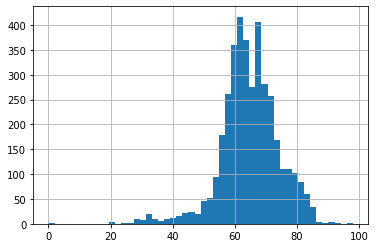

In [14]:
mergedFuzzyDf['Mapped Score Fuzzy'].hist(bins=50)

<AxesSubplot:>

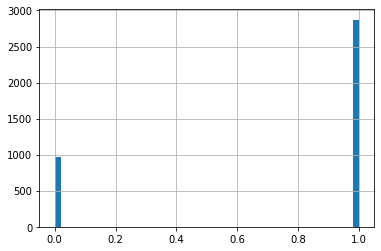

In [17]:
mergedMedcatDf['Context Similarity Score'].hist(bins=50)

### `mimiciv_cs_place_of_service`

In [32]:
posFuzzyDf = groupedFuzzyDf[groupedFuzzyDf.concept_vocabulary_id == 'mimiciv_cs_place_of_service']
posFuzzyDf['algo'] = 'Fuzzy'
posFuzzyDf

/tmp/ipykernel_2491615/3365774546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posFuzzyDf['algo'] = 'Fuzzy'


,concept_vocabulary_id,description_type_ids,concept_name,algo
0,mimiciv_cs_place_of_service,environment,1,Fuzzy
1,mimiciv_cs_place_of_service,finding,1,Fuzzy
2,mimiciv_cs_place_of_service,occupation,1,Fuzzy
3,mimiciv_cs_place_of_service,procedure,1,Fuzzy
4,mimiciv_cs_place_of_service,substance,1,Fuzzy


In [34]:
posMedcatDf = groupedMedcatDf[groupedMedcatDf.concept_vocabulary_id == 'mimiciv_cs_place_of_service']
posMedcatDf['algo'] = 'Medcat'
posMedcatDf

/tmp/ipykernel_2491615/2450124744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posMedcatDf['algo'] = 'Medcat'


,concept_vocabulary_id,description_type_ids,concept_name,algo
0,mimiciv_cs_place_of_service,finding,1,Medcat
1,mimiciv_cs_place_of_service,qualifier value,3,Medcat


In [38]:
posDf = pd.concat([posFuzzyDf, posMedcatDf], ignore_index=True, sort=False)
posDf

,concept_vocabulary_id,description_type_ids,concept_name,algo
0,mimiciv_cs_place_of_service,environment,1,Fuzzy
1,mimiciv_cs_place_of_service,finding,1,Fuzzy
2,mimiciv_cs_place_of_service,occupation,1,Fuzzy
3,mimiciv_cs_place_of_service,procedure,1,Fuzzy
4,mimiciv_cs_place_of_service,substance,1,Fuzzy
5,mimiciv_cs_place_of_service,finding,1,Medcat
6,mimiciv_cs_place_of_service,qualifier value,3,Medcat


#### Plot

In [91]:
description_type_ids = sorted(set(posDf.description_type_ids))
description_type_ids

['environment',
 'finding',
 'occupation',
 'procedure',
 'qualifier value',
 'substance']

In [92]:
fuzzyCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Fuzzy')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        fuzzyCounts.append(value)
    else:
        fuzzyCounts.append(0)
fuzzyCounts

[1, 1, 1, 1, 0, 1]

In [93]:
medcatCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Medcat')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        medcatCounts.append(value)
    else:
        medcatCounts.append(0)
medcatCounts

[0, 1, 0, 0, 3, 0]

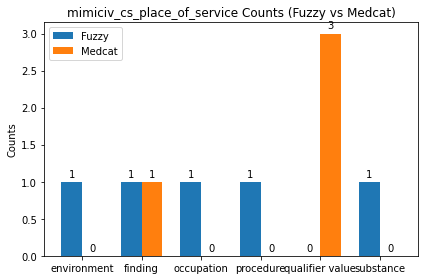

In [96]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(description_type_ids))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, fuzzyCounts, width, label='Fuzzy')
rects2 = ax.bar(x + width/2, medcatCounts, width, label='Medcat')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('mimiciv_cs_place_of_service Counts (Fuzzy vs Medcat)')
# ax.set_xticks(x, description_type_ids)
ax.set_xticks(x);
ax.set_xticklabels(description_type_ids)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### `mimiciv_micro_organism`

In [97]:
posFuzzyDf = groupedFuzzyDf[groupedFuzzyDf.concept_vocabulary_id == 'mimiciv_micro_organism']
posFuzzyDf['algo'] = 'Fuzzy'
posFuzzyDf

/tmp/ipykernel_2491615/1958834348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posFuzzyDf['algo'] = 'Fuzzy'


,concept_vocabulary_id,description_type_ids,concept_name,algo
121,mimiciv_micro_organism,cell,1,Fuzzy
122,mimiciv_micro_organism,disorder,6,Fuzzy
123,mimiciv_micro_organism,ethnic group,1,Fuzzy
124,mimiciv_micro_organism,finding,16,Fuzzy
125,mimiciv_micro_organism,organism,298,Fuzzy
126,mimiciv_micro_organism,procedure,14,Fuzzy
127,mimiciv_micro_organism,qualifier value,2,Fuzzy
128,mimiciv_micro_organism,specimen,15,Fuzzy
129,mimiciv_micro_organism,substance,11,Fuzzy


In [98]:
posMedcatDf = groupedMedcatDf[groupedMedcatDf.concept_vocabulary_id == 'mimiciv_micro_organism']
posMedcatDf['algo'] = 'Medcat'
posMedcatDf

/tmp/ipykernel_2491615/1406590039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posMedcatDf['algo'] = 'Medcat'


,concept_vocabulary_id,description_type_ids,concept_name,algo
58,mimiciv_micro_organism,disorder,2,Medcat
59,mimiciv_micro_organism,finding,1,Medcat
60,mimiciv_micro_organism,organism,315,Medcat
61,mimiciv_micro_organism,qualifier value,37,Medcat


In [99]:
posDf = pd.concat([posFuzzyDf, posMedcatDf], ignore_index=True, sort=False)
posDf

,concept_vocabulary_id,description_type_ids,concept_name,algo
0,mimiciv_micro_organism,cell,1,Fuzzy
1,mimiciv_micro_organism,disorder,6,Fuzzy
2,mimiciv_micro_organism,ethnic group,1,Fuzzy
3,mimiciv_micro_organism,finding,16,Fuzzy
4,mimiciv_micro_organism,organism,298,Fuzzy
5,mimiciv_micro_organism,procedure,14,Fuzzy
6,mimiciv_micro_organism,qualifier value,2,Fuzzy
7,mimiciv_micro_organism,specimen,15,Fuzzy
8,mimiciv_micro_organism,substance,11,Fuzzy
9,mimiciv_micro_organism,disorder,2,Medcat


#### Plot

In [100]:
description_type_ids = sorted(set(posDf.description_type_ids))
description_type_ids

['cell',
 'disorder',
 'ethnic group',
 'finding',
 'organism',
 'procedure',
 'qualifier value',
 'specimen',
 'substance']

In [101]:
fuzzyCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Fuzzy')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        fuzzyCounts.append(value)
    else:
        fuzzyCounts.append(0)
fuzzyCounts

[1, 6, 1, 16, 298, 14, 2, 15, 11]

In [102]:
medcatCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Medcat')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        medcatCounts.append(value)
    else:
        medcatCounts.append(0)
medcatCounts

[0, 2, 0, 1, 315, 0, 37, 0, 0]

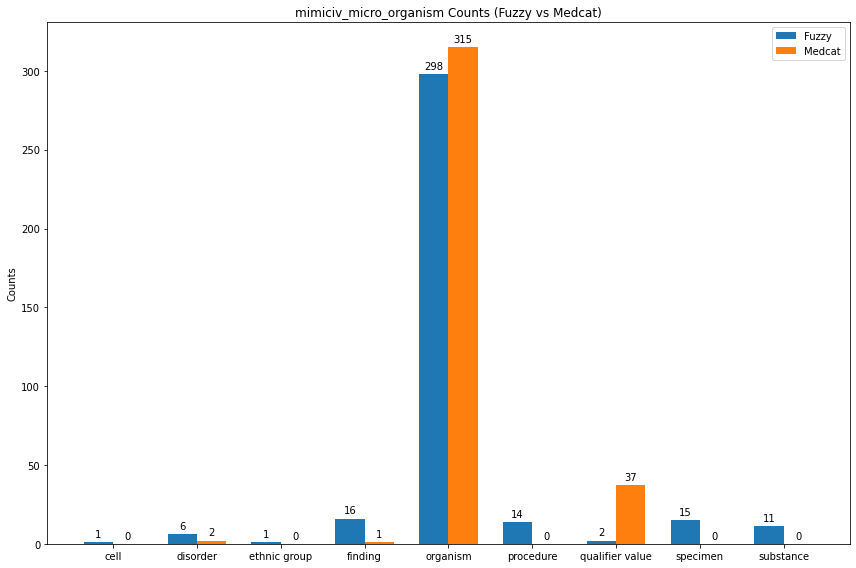

In [105]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(description_type_ids))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, fuzzyCounts, width, label='Fuzzy')
rects2 = ax.bar(x + width/2, medcatCounts, width, label='Medcat')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('mimiciv_micro_organism Counts (Fuzzy vs Medcat)')
# ax.set_xticks(x, description_type_ids)
ax.set_xticks(x);
ax.set_xticklabels(description_type_ids)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### `mimiciv_drug_ndc`

In [106]:
posFuzzyDf = groupedFuzzyDf[groupedFuzzyDf.concept_vocabulary_id == 'mimiciv_drug_ndc']
posFuzzyDf['algo'] = 'Fuzzy'
posFuzzyDf

/tmp/ipykernel_2491615/2795423135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posFuzzyDf['algo'] = 'Fuzzy'


,concept_vocabulary_id,description_type_ids,concept_name,algo
5,mimiciv_drug_ndc,AU qualifier,10,Fuzzy
6,mimiciv_drug_ndc,AU substance,199,Fuzzy
7,mimiciv_drug_ndc,attribute,3,Fuzzy
8,mimiciv_drug_ndc,basic dose form,1,Fuzzy
9,mimiciv_drug_ndc,body structure,1,Fuzzy
10,mimiciv_drug_ndc,clinical drug,3,Fuzzy
11,mimiciv_drug_ndc,containered trade product pack,1,Fuzzy
12,mimiciv_drug_ndc,disorder,14,Fuzzy
13,mimiciv_drug_ndc,dose form,15,Fuzzy
14,mimiciv_drug_ndc,environment,2,Fuzzy


In [107]:
posMedcatDf = groupedMedcatDf[groupedMedcatDf.concept_vocabulary_id == 'mimiciv_drug_ndc']
posMedcatDf['algo'] = 'Medcat'
posMedcatDf

/tmp/ipykernel_2491615/3225819574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posMedcatDf['algo'] = 'Medcat'


,concept_vocabulary_id,description_type_ids,concept_name,algo
2,mimiciv_drug_ndc,AU qualifier,1,Medcat
3,mimiciv_drug_ndc,body structure,4,Medcat
4,mimiciv_drug_ndc,clinical drug,83,Medcat
5,mimiciv_drug_ndc,disorder,1,Medcat
6,mimiciv_drug_ndc,dose form,157,Medcat
7,mimiciv_drug_ndc,finding,2,Medcat
8,mimiciv_drug_ndc,medicinal product,14,Medcat
9,mimiciv_drug_ndc,observable entity,2,Medcat
10,mimiciv_drug_ndc,organism,5,Medcat
11,mimiciv_drug_ndc,physical object,5,Medcat


In [108]:
posDf = pd.concat([posFuzzyDf, posMedcatDf], ignore_index=True, sort=False)
posDf

,concept_vocabulary_id,description_type_ids,concept_name,algo
0,mimiciv_drug_ndc,AU qualifier,10,Fuzzy
1,mimiciv_drug_ndc,AU substance,199,Fuzzy
2,mimiciv_drug_ndc,attribute,3,Fuzzy
3,mimiciv_drug_ndc,basic dose form,1,Fuzzy
4,mimiciv_drug_ndc,body structure,1,Fuzzy
5,mimiciv_drug_ndc,clinical drug,3,Fuzzy
6,mimiciv_drug_ndc,containered trade product pack,1,Fuzzy
7,mimiciv_drug_ndc,disorder,14,Fuzzy
8,mimiciv_drug_ndc,dose form,15,Fuzzy
9,mimiciv_drug_ndc,environment,2,Fuzzy


#### Plot

In [109]:
description_type_ids = sorted(set(posDf.description_type_ids))
description_type_ids

['AU qualifier',
 'AU substance',
 'attribute',
 'basic dose form',
 'body structure',
 'clinical drug',
 'containered trade product pack',
 'disorder',
 'dose form',
 'environment',
 'event',
 'finding',
 'geographic location',
 'medicinal product',
 'medicinal product pack',
 'observable entity',
 'occupation',
 'organism',
 'physical object',
 'procedure',
 'product',
 'qualifier value',
 'regime/therapy',
 'situation',
 'substance',
 'trade product',
 'trade product pack']

In [110]:
fuzzyCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Fuzzy')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        fuzzyCounts.append(value)
    else:
        fuzzyCounts.append(0)
fuzzyCounts

[10,
 199,
 3,
 1,
 1,
 3,
 1,
 14,
 15,
 2,
 1,
 74,
 1,
 104,
 42,
 0,
 8,
 18,
 1,
 27,
 1,
 8,
 1,
 5,
 493,
 79,
 63]

In [111]:
medcatCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Medcat')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        medcatCounts.append(value)
    else:
        medcatCounts.append(0)
medcatCounts

[1,
 0,
 0,
 0,
 4,
 83,
 0,
 1,
 157,
 0,
 0,
 2,
 0,
 14,
 0,
 2,
 0,
 5,
 5,
 0,
 0,
 30,
 2,
 0,
 422,
 143,
 0]

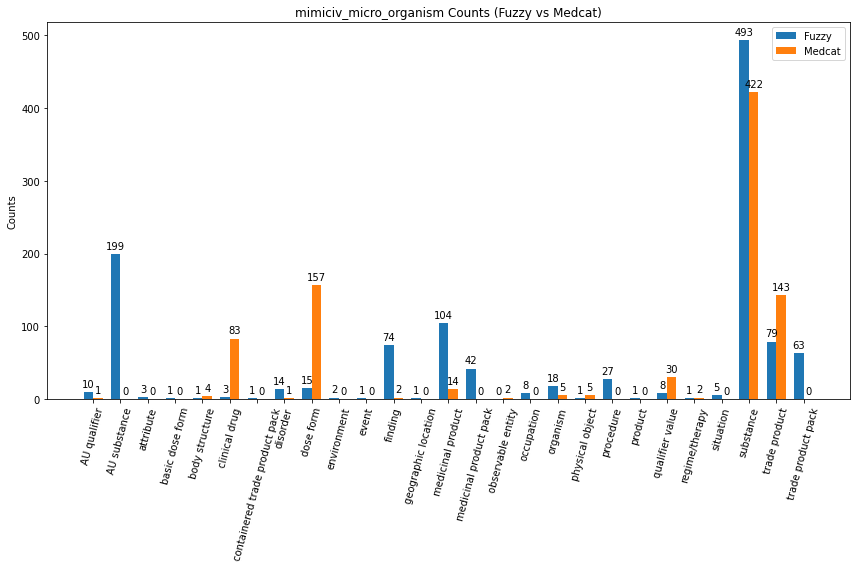

In [117]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(description_type_ids))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, fuzzyCounts, width, label='Fuzzy')
rects2 = ax.bar(x + width/2, medcatCounts, width, label='Medcat')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('mimiciv_micro_organism Counts (Fuzzy vs Medcat)')
# ax.set_xticks(x, description_type_ids)
ax.set_xticks(x);
ax.set_xticklabels(description_type_ids, rotation=75)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### `mimiciv_drug_route`

In [118]:
posFuzzyDf = groupedFuzzyDf[groupedFuzzyDf.concept_vocabulary_id == 'mimiciv_drug_route']
posFuzzyDf['algo'] = 'Fuzzy'
posFuzzyDf

/tmp/ipykernel_2491615/2212204972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posFuzzyDf['algo'] = 'Fuzzy'


,concept_vocabulary_id,description_type_ids,concept_name,algo
31,mimiciv_drug_route,attribute,1,Fuzzy
32,mimiciv_drug_route,cell,5,Fuzzy
33,mimiciv_drug_route,disorder,4,Fuzzy
34,mimiciv_drug_route,event,16,Fuzzy
35,mimiciv_drug_route,finding,16,Fuzzy
36,mimiciv_drug_route,intended site,3,Fuzzy
37,mimiciv_drug_route,occupation,1,Fuzzy
38,mimiciv_drug_route,organism,12,Fuzzy
39,mimiciv_drug_route,person,17,Fuzzy
40,mimiciv_drug_route,physical object,1,Fuzzy


In [119]:
posMedcatDf = groupedMedcatDf[groupedMedcatDf.concept_vocabulary_id == 'mimiciv_drug_route']
posMedcatDf['algo'] = 'Medcat'
posMedcatDf

/tmp/ipykernel_2491615/4008672750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posMedcatDf['algo'] = 'Medcat'


,concept_vocabulary_id,description_type_ids,concept_name,algo
16,mimiciv_drug_route,body structure,8,Medcat
17,mimiciv_drug_route,intended site,2,Medcat
18,mimiciv_drug_route,procedure,5,Medcat
19,mimiciv_drug_route,qualifier value,3,Medcat
20,mimiciv_drug_route,substance,1,Medcat


In [120]:
posDf = pd.concat([posFuzzyDf, posMedcatDf], ignore_index=True, sort=False)
posDf

,concept_vocabulary_id,description_type_ids,concept_name,algo
0,mimiciv_drug_route,attribute,1,Fuzzy
1,mimiciv_drug_route,cell,5,Fuzzy
2,mimiciv_drug_route,disorder,4,Fuzzy
3,mimiciv_drug_route,event,16,Fuzzy
4,mimiciv_drug_route,finding,16,Fuzzy
5,mimiciv_drug_route,intended site,3,Fuzzy
6,mimiciv_drug_route,occupation,1,Fuzzy
7,mimiciv_drug_route,organism,12,Fuzzy
8,mimiciv_drug_route,person,17,Fuzzy
9,mimiciv_drug_route,physical object,1,Fuzzy


#### Plot

In [121]:
description_type_ids = sorted(set(posDf.description_type_ids))
description_type_ids

['attribute',
 'body structure',
 'cell',
 'disorder',
 'event',
 'finding',
 'intended site',
 'occupation',
 'organism',
 'person',
 'physical object',
 'procedure',
 'qualifier value',
 'substance',
 'trade product']

In [122]:
fuzzyCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Fuzzy')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        fuzzyCounts.append(value)
    else:
        fuzzyCounts.append(0)
fuzzyCounts

[1, 0, 5, 4, 16, 16, 3, 1, 12, 17, 1, 7, 0, 12, 1]

In [123]:
medcatCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Medcat')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        medcatCounts.append(value)
    else:
        medcatCounts.append(0)
medcatCounts

[0, 8, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 3, 1, 0]

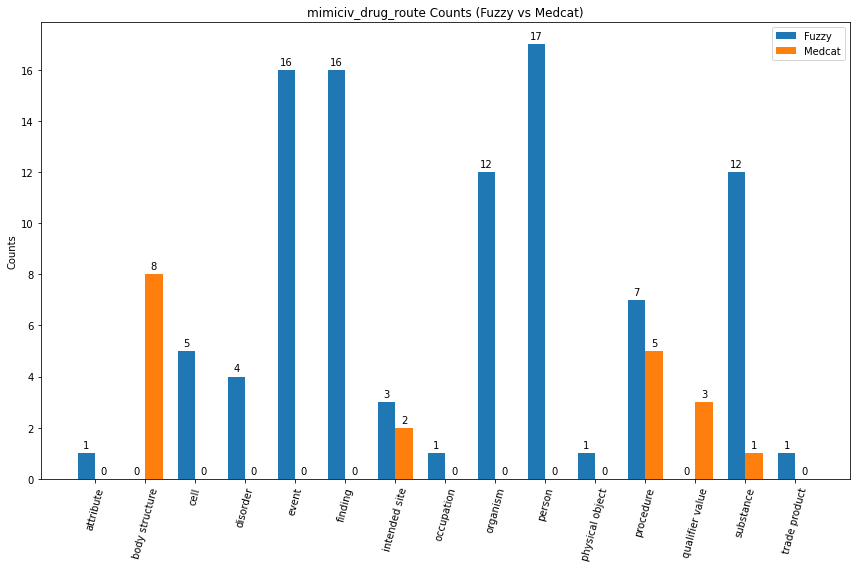

In [124]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(description_type_ids))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, fuzzyCounts, width, label='Fuzzy')
rects2 = ax.bar(x + width/2, medcatCounts, width, label='Medcat')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('mimiciv_drug_route Counts (Fuzzy vs Medcat)')
# ax.set_xticks(x, description_type_ids)
ax.set_xticks(x);
ax.set_xticklabels(description_type_ids, rotation=75)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

### `mimiciv_proc_datetimeevents`

In [125]:
posFuzzyDf = groupedFuzzyDf[groupedFuzzyDf.concept_vocabulary_id == 'mimiciv_proc_datetimeevents']
posFuzzyDf['algo'] = 'Fuzzy'
posFuzzyDf

/tmp/ipykernel_2491615/1420471355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posFuzzyDf['algo'] = 'Fuzzy'


,concept_vocabulary_id,description_type_ids,concept_name,algo
185,mimiciv_proc_datetimeevents,attribute,15,Fuzzy
186,mimiciv_proc_datetimeevents,cell,1,Fuzzy
187,mimiciv_proc_datetimeevents,disorder,6,Fuzzy
188,mimiciv_proc_datetimeevents,event,2,Fuzzy
189,mimiciv_proc_datetimeevents,finding,24,Fuzzy
190,mimiciv_proc_datetimeevents,link assertion,1,Fuzzy
191,mimiciv_proc_datetimeevents,occupation,2,Fuzzy
192,mimiciv_proc_datetimeevents,organism,1,Fuzzy
193,mimiciv_proc_datetimeevents,physical object,5,Fuzzy
194,mimiciv_proc_datetimeevents,procedure,54,Fuzzy


In [126]:
posMedcatDf = groupedMedcatDf[groupedMedcatDf.concept_vocabulary_id == 'mimiciv_proc_datetimeevents']
posMedcatDf['algo'] = 'Medcat'
posMedcatDf

/tmp/ipykernel_2491615/1651051231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posMedcatDf['algo'] = 'Medcat'


,concept_vocabulary_id,description_type_ids,concept_name,algo
101,mimiciv_proc_datetimeevents,administration method,2,Medcat
102,mimiciv_proc_datetimeevents,body structure,5,Medcat
103,mimiciv_proc_datetimeevents,disorder,5,Medcat
104,mimiciv_proc_datetimeevents,environment,2,Medcat
105,mimiciv_proc_datetimeevents,observable entity,4,Medcat
106,mimiciv_proc_datetimeevents,occupation,1,Medcat
107,mimiciv_proc_datetimeevents,physical object,40,Medcat
108,mimiciv_proc_datetimeevents,procedure,13,Medcat
109,mimiciv_proc_datetimeevents,qualifier value,37,Medcat


In [127]:
posDf = pd.concat([posFuzzyDf, posMedcatDf], ignore_index=True, sort=False)
posDf

,concept_vocabulary_id,description_type_ids,concept_name,algo
0,mimiciv_proc_datetimeevents,attribute,15,Fuzzy
1,mimiciv_proc_datetimeevents,cell,1,Fuzzy
2,mimiciv_proc_datetimeevents,disorder,6,Fuzzy
3,mimiciv_proc_datetimeevents,event,2,Fuzzy
4,mimiciv_proc_datetimeevents,finding,24,Fuzzy
5,mimiciv_proc_datetimeevents,link assertion,1,Fuzzy
6,mimiciv_proc_datetimeevents,occupation,2,Fuzzy
7,mimiciv_proc_datetimeevents,organism,1,Fuzzy
8,mimiciv_proc_datetimeevents,physical object,5,Fuzzy
9,mimiciv_proc_datetimeevents,procedure,54,Fuzzy


#### Plot

In [128]:
description_type_ids = sorted(set(posDf.description_type_ids))
description_type_ids

['administration method',
 'attribute',
 'body structure',
 'cell',
 'disorder',
 'environment',
 'event',
 'finding',
 'link assertion',
 'observable entity',
 'occupation',
 'organism',
 'physical object',
 'procedure',
 'qualifier value',
 'situation',
 'substance',
 'trade product']

In [129]:
fuzzyCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Fuzzy')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        fuzzyCounts.append(value)
    else:
        fuzzyCounts.append(0)
fuzzyCounts

[0, 15, 0, 1, 6, 0, 2, 24, 1, 0, 2, 1, 5, 54, 2, 8, 5, 3]

In [130]:
medcatCounts = []
for description_type_id in description_type_ids:
    values = posDf[(posDf.description_type_ids == description_type_id) & (posDf.algo == 'Medcat')].concept_name.values
    value = values[0] if len(values) > 0 else None
    if value:
        medcatCounts.append(value)
    else:
        medcatCounts.append(0)
medcatCounts

[2, 0, 5, 0, 5, 2, 0, 0, 0, 4, 1, 0, 40, 13, 37, 0, 0, 0]

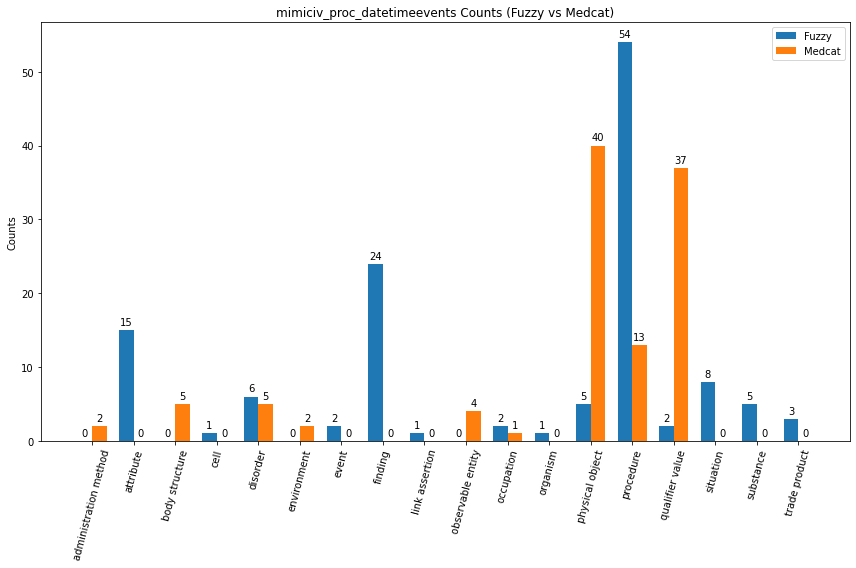

In [131]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(description_type_ids))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, fuzzyCounts, width, label='Fuzzy')
rects2 = ax.bar(x + width/2, medcatCounts, width, label='Medcat')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('mimiciv_proc_datetimeevents Counts (Fuzzy vs Medcat)')
# ax.set_xticks(x, description_type_ids)
ax.set_xticks(x);
ax.set_xticklabels(description_type_ids, rotation=75)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()